In [341]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import csv
import seaborn as sb
import re
import seaborn as sns
import itertools

In [342]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from sklearn.linear_model import PassiveAggressiveClassifier


In [254]:
# read files
True_news = pd.read_csv('/kaggle/input/datdset/True.csv')
Fake_news = pd.read_csv('/kaggle/input/datdset/Fake.csv')

In [255]:
# create label that take value true at 0

True_news['label'] = 0

# create label that take value false at 1

Fake_news['label'] = 1

In [256]:
# check the if data in files read probably and print first 10 records
True_news.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [257]:
# check the if data in files read probably and print first 10 records
Fake_news.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [258]:
# create to dataset that holds the feastures that we decide to train on it
dataset1 = True_news[['text','label']]
dataset2 = Fake_news[['text','label']]

### **Word Cloud Visualization**

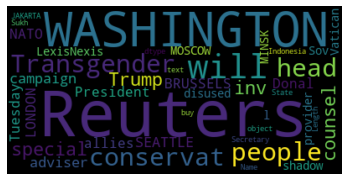

In [259]:
# create a list of the text data from the 'text' column
text = str(dataset1['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


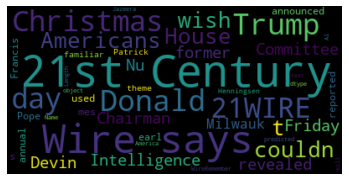

In [260]:
# create a list of the text data from the 'text' column
text = str(dataset2['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# **Merging Dataset1 and Dataset2 Dataframes**

In [261]:
# merge dataset1 and dataset2 in one new dataset
dataset = pd.concat([dataset1 , dataset2])

In [262]:
# dimensions of dataset contaning 44898 columns and 5 rows
dataset.shape

(44898, 2)

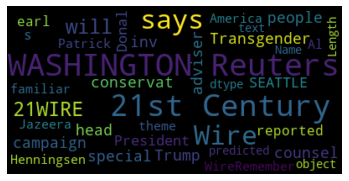

In [263]:
# create a list of the text data from the 'text' column
text = str(dataset['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### **Data Distribution**

<AxesSubplot:xlabel='label', ylabel='count'>

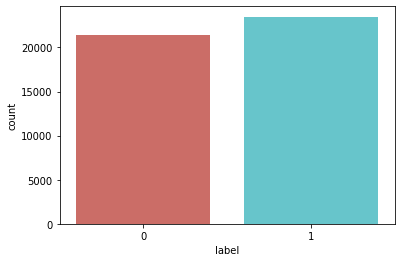

In [264]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(dataset)

In [265]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.isnull().sum()

text     0
label    0
dtype: int64

### **Data Quality Check**

In [266]:
# function help to check data quality 
def data_qualityCheck():
    print("Checking data qualitites..")
    # no null values
    dataset.isnull().sum()
    dataset.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites..
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
check finished.


### Balanced or Unbalanced dataset

In [267]:
dataset['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

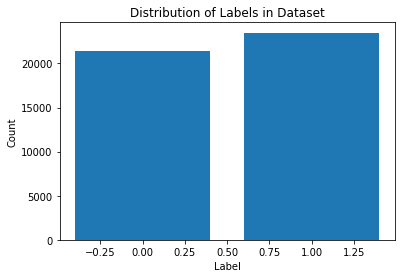

In [268]:
# Get the counts of each label
label_counts = dataset['label'].value_counts()

# Create a bar chart
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Dataset')
plt.show()


In [269]:
dataset1.shape # true news

(21417, 2)

In [270]:
dataset2.shape # fake news

(23481, 2)

### Shuffle or Resample

In [271]:
# resample the data
dataset = dataset.sample(frac = 1)

In [272]:
dataset.head(20)

,text,label
11129,"Watch these two stunning interviews, where pol...",1
18732,From the Vanity Fair article: Milo Yiannopoulo...,1
593,WASHINGTON (Reuters) - U.S. President Donald T...,0
8626,(Reuters) - The U.S. Food and Drug Administrat...,0
9954,It was a surreal moment at Thursday night s NF...,1
5510,CNN s Chris Cuomo tried to have a discussion a...,1
18478,PRESIDENT TRUMP S REMARKS TODAY IN MIAMI INCLU...,1
9053,WASHINGTON (Reuters) - President Barack Obama’...,0
14732,BERLIN (Reuters) - Peter Altmaier once said he...,0
5732,Christian parents who homeschool their childre...,1


In [273]:
dataset.describe

<bound method NDFrame.describe of                                                     text  label
11129  Watch these two stunning interviews, where pol...      1
18732  From the Vanity Fair article: Milo Yiannopoulo...      1
593    WASHINGTON (Reuters) - U.S. President Donald T...      0
8626   (Reuters) - The U.S. Food and Drug Administrat...      0
9954   It was a surreal moment at Thursday night s NF...      1
...                                                  ...    ...
9658   White House Press Secretary Sarah Sanders on W...      1
8632   PHILADELPHIA (Reuters) - Democrats divided ove...      0
2874   Remember that time Sarah Palin and pretty much...      1
10102  WASHINGTON (Reuters) - Wall Street investment ...      0
17088  Oops! Hillary Clinton thought her server was w...      1

[44898 rows x 2 columns]>

In [274]:
dataset.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# **Cleaning Data Process**

In [275]:
ps = WordNetLemmatizer()

In [276]:
# removing unwanted words in text to improve preformunce 
stopwords = stopwords.words('english')

In [277]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using Regular expression
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

In [278]:
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x)) # apply cleaning_data on the dataset text cloumn 

In [279]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

# **Convert text to vectors**

In [280]:
# convert text to numerical data can be used in our modules
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2)) # 1-gram 2- gram combination words

In [281]:
dataset.shape

(44898, 2)

In [282]:
X = dataset.iloc[:35000,0] # rows 
y = dataset.iloc[:35000,1] # columns 

In [283]:
X.head()

11129    watch two stunning interview police officer al...
18732    vanity fair article milo yiannopoulos former t...
593      washington reuters u president donald trump be...
8626     reuters u food drug administration opened door...
9954     surreal moment thursday night nfl season opene...
Name: text, dtype: object

In [284]:
y.head()

11129    1
18732    1
593      0
8626     0
9954     1
Name: label, dtype: int64

### **Training and Test Set**

In [285]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 0)

In [286]:
# First fits the vectorizer to the training data by learning the vocabulary, 
# Transforms the training data into a numerical feature matrix.
# store it in vec_train after converted it to numpy array using toarray() function

vec_train_data = vectorizer.fit_transform(X_train).toarray()

In [287]:
X_train.shape , X_test.shape

((28000,), (7000,))

In [288]:
vec_test_data = vectorizer.transform(X_test).toarray()

In [289]:
vec_train_data.shape , vec_test_data.shape

((28000, 50000), (7000, 50000))

In [290]:
y_train.value_counts() # balanced partition

1    14666
0    13334
Name: label, dtype: int64

In [291]:
y_test.value_counts() # balanced partition

1    3614
0    3386
Name: label, dtype: int64

In [292]:
# This method returns a list of the feature names that were learned during the fit process, 
# which are essentially the unique words or n-grams that were found in the training data. 
X_training = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names_out())
X_testing = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names_out())

# **Logestic Reegression**

# Passive Aggressive Classifier

In [345]:
classifier = PassiveAggressiveClassifier()
classifier.fit(vec_train_data,y_train)

PassiveAggressiveClassifier()

# Confusion Matrix

In [346]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PassiveAggressiveClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Confusion matrix, without normalization


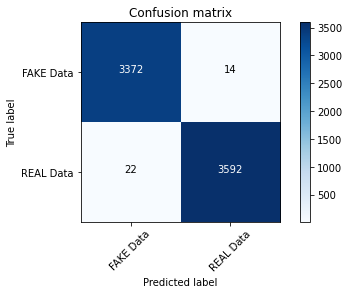

In [347]:
y_pred = classifier.predict(X_testing)
score = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'], normalize=False)

In [348]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.49%
